In [4]:
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np

# 데이터 로드
data_path = '/content/week5_test.csv'
data = pd.read_csv(data_path)

# 필요한 변수 선택 (GyroX, GyroY, GyroZ, Temperature, Heartbeat)
selected_features = ['GyroX', 'GyroY', 'GyroZ', 'Temperature', 'Heartbeat']
X = data[selected_features]

# 데이터 전처리 (예: 정규화)
X_normalized = (X - X.min()) / (X.max() - X.min())

# One-class SVM 모델 생성 및 학습
model = OneClassSVM(kernel='rbf', nu=0.05)  # nu는 이상치 비율을 설정하는 매개변수
model.fit(X_normalized)

# 이상치 판별
outliers = model.predict(X_normalized)  # -1이면 이상치, 1이면 정상치로 분류

# 이상치 결과 출력
outliers_df = pd.DataFrame({'Outlier': outliers}, index=data.index)
result = pd.concat([data, outliers_df], axis=1)
print(result)


     UserCode    Label  GyroX  GyroY     GyroZ  Temperature  Heartbeat  \
0           8  Walking   5.41  13.21 -4.630918         36.8         94   
1           8  Walking   6.74   8.16  0.953424         36.9         93   
2           8  Walking   5.33   5.37 -2.792171         36.9         91   
3           8  Walking   3.38   8.54 -1.525479         36.8         93   
4           8  Walking   1.73   9.11 -0.994285         36.7         93   
..        ...      ...    ...    ...       ...          ...        ...   
668         8  Walking  -0.99   3.57 -2.301839         36.8         95   
669         8  Walking   0.42   3.72  1.729784         36.7         93   
670         8  Walking  12.07   4.90  5.706926         36.7         91   
671         8  Walking  16.82  13.40  8.281172         36.8         90   
672         8  Walking   5.33   1.84  2.642348         36.8         91   

           Lat         Lng   No     time  Outlier  
0    35.235809  129.077699    1  0:00:00        1  
1    35

In [6]:
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np

# 데이터 로드
data_path = '/content/week5_test.csv'
data = pd.read_csv(data_path)

# 필요한 변수 선택 (GyroX, GyroY, GyroZ, Temperature, Heartbeat)
selected_features = ['GyroX', 'GyroY', 'GyroZ', 'Temperature', 'Heartbeat']
X = data[selected_features]
y = data['Label']  # 라벨 데이터 로드

# 정상 데이터 선택
normal_data = X[y == 'Walking']  # 예시로 'Walking' 라벨을 정상 데이터로 설정

# 데이터 전처리 (예: 정규화)
X_normalized = (X - X.min()) / (X.max() - X.min())

# One-class SVM 모델 생성 및 학습
model = OneClassSVM(kernel='rbf', nu=0.05)  # nu는 이상치 비율을 설정하는 매개변수
model.fit(normal_data)

# 이상치 판별
outliers = model.predict(X_normalized)  # -1이면 이상치, 1이면 정상치로 분류

# 이상치 결과 출력
outliers_df = pd.DataFrame({'Outlier': outliers}, index=data.index)
result = pd.concat([data, outliers_df], axis=1)
print(result)


     UserCode    Label  GyroX  GyroY     GyroZ  Temperature  Heartbeat  \
0           8  Walking   5.41  13.21 -4.630918         36.8         94   
1           8  Walking   6.74   8.16  0.953424         36.9         93   
2           8  Walking   5.33   5.37 -2.792171         36.9         91   
3           8  Walking   3.38   8.54 -1.525479         36.8         93   
4           8  Walking   1.73   9.11 -0.994285         36.7         93   
..        ...      ...    ...    ...       ...          ...        ...   
668         8  Walking  -0.99   3.57 -2.301839         36.8         95   
669         8  Walking   0.42   3.72  1.729784         36.7         93   
670         8  Walking  12.07   4.90  5.706926         36.7         91   
671         8  Walking  16.82  13.40  8.281172         36.8         90   
672         8  Walking   5.33   1.84  2.642348         36.8         91   

           Lat         Lng   No     time  Outlier  
0    35.235809  129.077699    1  0:00:00       -1  
1    35

In [8]:
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np

# 데이터 로드
data_path = '/content/week5_test.csv'
data = pd.read_csv(data_path)

# 필요한 변수 선택 (GyroX, GyroY, GyroZ, Temperature, Heartbeat)
selected_features = ['GyroX', 'GyroY', 'GyroZ', 'Temperature', 'Heartbeat']
X = data[selected_features]
y = data['Label']  # 라벨 데이터 로드

# 정상 데이터 선택
normal_data = X[y != 'fall']  # 'fall' 라벨을 제외한 데이터를 정상 데이터로 설정.

# 데이터 전처리 (예: 정규화)
X_normalized = (X - X.min()) / (X.max() - X.min())

# One-class SVM 모델 생성 및 학습
model = OneClassSVM(kernel='rbf', nu=0.05)  # nu는 이상치 비율을 설정하는 매개변수.
model.fit(normal_data)

# 이상치 판별
outliers = model.predict(X_normalized)  # -1이면 이상치, 1이면 정상치로 분류.

# 이상치 결과 출력
outliers_df = pd.DataFrame({'Outlier': outliers}, index=data.index)
result = pd.concat([data, outliers_df], axis=1)
print(result)

# 'fall' 라벨이 이상치인 경우 코드 수정:
outliers_fall = result[result['Label'] == 'fall']['Outlier']
print(outliers_fall)


     UserCode    Label  GyroX  GyroY     GyroZ  Temperature  Heartbeat  \
0           8  Walking   5.41  13.21 -4.630918         36.8         94   
1           8  Walking   6.74   8.16  0.953424         36.9         93   
2           8  Walking   5.33   5.37 -2.792171         36.9         91   
3           8  Walking   3.38   8.54 -1.525479         36.8         93   
4           8  Walking   1.73   9.11 -0.994285         36.7         93   
..        ...      ...    ...    ...       ...          ...        ...   
668         8  Walking  -0.99   3.57 -2.301839         36.8         95   
669         8  Walking   0.42   3.72  1.729784         36.7         93   
670         8  Walking  12.07   4.90  5.706926         36.7         91   
671         8  Walking  16.82  13.40  8.281172         36.8         90   
672         8  Walking   5.33   1.84  2.642348         36.8         91   

           Lat         Lng   No     time  Outlier  
0    35.235809  129.077699    1  0:00:00       -1  
1    35

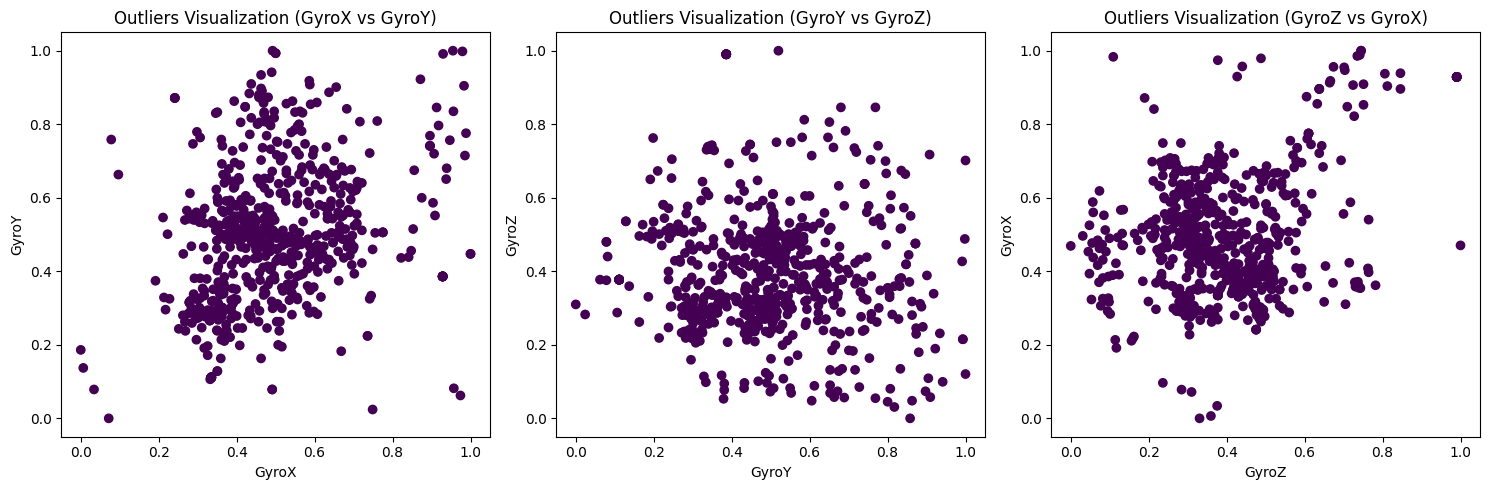

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# GyroX vs GyroY
axes[0].scatter(X_normalized['GyroX'], X_normalized['GyroY'], c=outliers)
axes[0].set_xlabel('GyroX')
axes[0].set_ylabel('GyroY')
axes[0].set_title('Outliers Visualization (GyroX vs GyroY)')

# GyroY vs GyroZ
axes[1].scatter(X_normalized['GyroY'], X_normalized['GyroZ'], c=outliers)
axes[1].set_xlabel('GyroY')
axes[1].set_ylabel('GyroZ')
axes[1].set_title('Outliers Visualization (GyroY vs GyroZ)')

# GyroZ vs GyroX
axes[2].scatter(X_normalized['GyroZ'], X_normalized['GyroX'], c=outliers)
axes[2].set_xlabel('GyroZ')
axes[2].set_ylabel('GyroX')
axes[2].set_title('Outliers Visualization (GyroZ vs GyroX)')

plt.tight_layout()
plt.show()



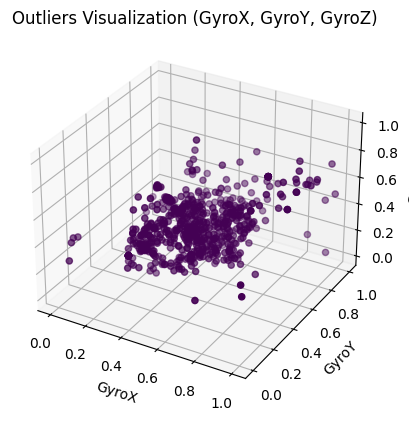

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 이상치 시각화 - GyroX, GyroY, GyroZ
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_normalized['GyroX'], X_normalized['GyroY'], X_normalized['GyroZ'], c=outliers)
ax.set_xlabel('GyroX')
ax.set_ylabel('GyroY')
ax.set_zlabel('GyroZ')
ax.set_title('Outliers Visualization (GyroX, GyroY, GyroZ)')
plt.show()
